In [53]:
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
import numpy as np

In [18]:
iris_dataset = load_iris()
x = iris_dataset.data
y = iris_dataset.target
target_names = iris_dataset.target_names

df = pd.DataFrame(data = x, columns= iris_dataset.feature_names)
df['species'] = y
print(f'Feature names: {iris_dataset.feature_names}')
print(f'Target names: {target_names}')
df.tail()
iris_dataset.feature_names

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [15]:
corr_matrix = df.corr()
print(corr_matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
species                     0.782561         -0.426658           0.949035   

                   petal width (cm)   species  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
species                    0.956547  1.000000  


In [33]:
iris_heatmap_data = pd.pivot_table(
                    df, index = df['species'],
                    values = iris_dataset.feature_names, 
                    aggfunc='mean')
iris_heatmap_data

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
species,,,,
0,1.462,0.246,5.006,3.428
1,4.260,1.326,5.936,2.770
2,5.552,2.026,6.588,2.974


<Axes: ylabel='species'>

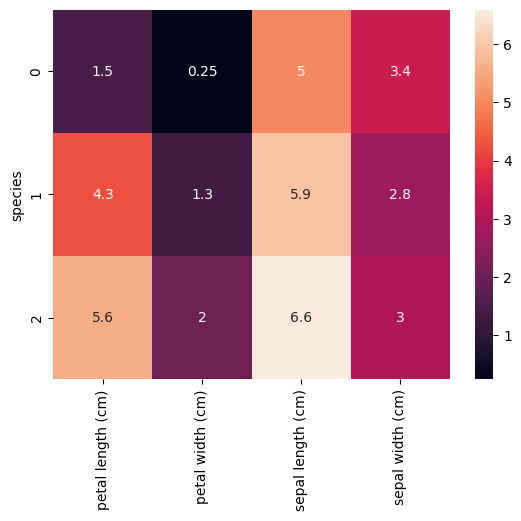

In [34]:
sns.heatmap(iris_heatmap_data, annot=True)

### -> (The 'width' features don't seem to have good correlation with the target, so let's try to find the model performance with and without the feature 'width' to see the model's performance.)

## **Hypothesis**: Model's performance isn't affected by the feature's **'width'** 

# Checking model performance without **'width'** features

In [45]:
width_dropped_df = df.drop(['sepal width (cm)', 'petal width (cm)'], axis = 1)
width_dropped_df

,sepal length (cm),petal length (cm),species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [47]:
# Train-test split
X = width_dropped_df.drop(['species'], axis = 1)
y = width_dropped_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [49]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [50]:
# k-fold cv (cross validation)
# 10 folds (a standard practice for low bias)
scores = cross_val_score(log_model, X_train, y_train, scoring= 'r2', cv = 10)
scores

array([1.        , 0.85526316, 0.85526316, 0.71052632, 0.71052632,
       0.83333333, 1.        , 1.        , 1.        , 0.71014493])

In [52]:
# Average score
print(np.mean(scores))

0.8675057208237986


In [54]:
# Cross-validatioin predict

pred = cross_val_predict(log_model, X_test, y_test)
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0])

In [57]:
score_test = cross_val_score(log_model, X_test, y_test, cv = 10)
score_test

array([1.  , 1.  , 1.  , 0.8 , 1.  , 1.  , 1.  , 1.  , 1.  , 0.75])

In [58]:
# Prediction score_test average
print(np.mean(score_test))

0.9550000000000001


# Checking model performance with **'width'** features

In [59]:
# Train-test split
X = df.drop(['species'], axis = 1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [60]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [61]:
scores = cross_val_score(log_model, X_train, y_train, cv = 10)
scores

/home/root123/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1.        , 1.        , 1.        , 0.81818182, 0.90909091,
       1.        , 1.        , 1.        , 1.        , 0.9       ])

In [62]:
print(np.mean(scores))

0.9627272727272727


In [63]:
predict = cross_val_predict(log_model, X_test, y_test, cv = 10)
predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [64]:
scores_test = cross_val_score(log_model, X_test, y_test, cv = 10)
scores_test

array([1. , 1. , 1. , 0.8, 1. , 1. , 1. , 1. , 1. , 1. ])

In [65]:
print(np.mean(scores_test))

0.9800000000000001


In [72]:
# Without 'width'
'''
Cross-val-score on training: 0.8675
Cross-val-score on testing: 0.955
'''

# With 'width'
'''
Cross-val-score on training: 0.9627
Cross-val-score on testing: 0.98
'''
# Finding: The 'width' features do play a role in model's performance. (Hypothesis rejected!)

'\nCross-val-score on training: 0.9627\nCross-val-score on testing: 0.98\n'